1. Import Dependencies and Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


#data_set_from: https://www.kaggle.com/datasets/muthuj7/weather-dataset/ -> History


2. Import Database and preprocessing

In [2]:
df = pd.read_csv('weatherHistory.csv', index_col=False)
df = df.copy()
df.sort_values(by='Formatted Date', ascending = True, inplace = True) 
df = df.reset_index(drop=True)
df.head()


Formatted Date        Summary Precip Type  Temperature (C)  \
0   2006-01-01 00:00:00  Partly Cloudy        rain         0.577778   
1   2006-01-01 01:00:00  Mostly Cloudy        rain         1.161111   
2   2006-01-01 02:00:00  Mostly Cloudy        rain         1.666667   
3   2006-01-01 03:00:00       Overcast        rain         1.711111   
4   2006-01-01 04:00:00  Mostly Cloudy        rain         1.183333   
5   2006-01-01 05:00:00  Mostly Cloudy        rain         1.205556   
6   2006-01-01 06:00:00  Mostly Cloudy        rain         2.222222   
7   2006-01-01 07:00:00  Mostly Cloudy        rain         2.072222   
8   2006-01-01 08:00:00  Mostly Cloudy        rain         2.200000   
9   2006-01-01 09:00:00  Mostly Cloudy        rain         2.733333   
10  2006-01-01 10:00:00  Mostly Cloudy        rain         2.788889   
11  2006-01-01 11:00:00  Mostly Cloudy        rain         3.822222   
12  2006-01-01 12:00:00  Mostly Cloudy        rain         4.911111   
13  2006-01-01 13:00:00  Mostly Cloudy        rain         6.205556   
14  2006-01-01 14:00:00  Partly Cloudy        rain         7.438889   
15  2006-01-01 15:00:00  Mostly Cloudy        rain         6.950000   
16  2006-01-01 16:00:00  Mostly Cloudy        rain         5.972222   
17  2006-01-01 17:00:00       Overcast        rain         5.905556   
18  2006-01-01 18:00:00       Overcast        rain         4.955556   
19  2006-01-01 19:00:00       Overcast        rain         5.472222   
20  2006-01-01 20:00:00       Overcast        rain         5.972222   
21  2006-01-01 21:00:00       Overcast        rain         4.933333   
22  2006-01-01 22:00:00       Overcast        rain         5.472222   
23  2006-01-01 23:00:00       Overcast        rain         5.422222   
24  2006-01-02 00:00:00       Overcast        rain         5.422222   
25  2006-01-02 01:00:00       Overcast        rain         2.350000   
26  2006-01-02 02:00:00       Overcast        rain         5.422222   
27  2006-01-02 03:00:00       Overcast        rain         5.905556   
28  2006-01-02 04:00:00       Overcast        rain         5.966667   
29  2006-01-02 05:00:00       Overcast        rain         5.950000   

    Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  -4.050000      0.89            17.1143   
1                  -3.238889      0.85            16.6152   
2                  -3.155556      0.82            20.2538   
3                  -2.194444      0.82            14.4900   
4                  -2.744444      0.86            13.9426   
5                  -3.072222      0.85            15.9068   
6                  -2.494444      0.79            20.5597   
7                  -3.272222      0.81            25.4219   
8                  -2.850000      0.80            23.1679   
9                  -2.133333      0.82            22.8781   
10                 -1.905556      0.83            21.6062   
11                 -0.738889      0.82            22.7976   
12                  0.805556      0.77            21.4452   
13                  2.238889      0.76            23.4094   
14                  3.677778      0.72            24.8423   
15                  2.811111      0.74            27.5954   
16                  2.388889      0.81            19.3200   
17                  2.250000      0.80            19.7869   
18                  0.383333      0.86            25.9371   
19                  1.100000      0.83            25.4058   
20                  1.861111      0.80            24.2305   
21                  0.555556      0.86            23.9407   
22                  1.377778      0.87            22.7171   
23                  1.666667      0.86            19.5615   
24                  2.494444      0.86            13.6689   
25                 -1.550000      0.91            15.2950   
26                  2.022222      0.80            16.8245   
27                  2.277778      0.80            19.5615   
28                  2.405556      0.80

In [3]:
weather = df.loc[:, ['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)']]
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'])
weather.sort_values(by=['Formatted Date'])
weather.head()

type(weather['Formatted Date'])

pandas.core.series.Series

In [4]:
weather = weather.dropna(axis=0)
weather.head()

Formatted Date  Temperature (C)  Apparent Temperature (C)
0     2006-01-01 00:00:00         0.577778                 -4.050000
1     2006-01-01 01:00:00         1.161111                 -3.238889
2     2006-01-01 02:00:00         1.666667                 -3.155556
3     2006-01-01 03:00:00         1.711111                 -2.194444
4     2006-01-01 04:00:00         1.183333                 -2.744444
...                   ...              ...                       ...
96448 2016-12-31 19:00:00         0.488889                 -2.644444
96449 2016-12-31 20:00:00         0.072222                 -3.050000
96450 2016-12-31 21:00:00        -0.233333                 -3.377778
96451 2016-12-31 22:00:00        -0.472222                 -3.644444
96452 2016-12-31 23:00:00        -0.677778                 -3.888889

[96453 rows x 3 columns]

In [5]:
weather.isnull().sum()

Formatted Date              0
Temperature (C)             0
Apparent Temperature (C)    0
dtype: int64

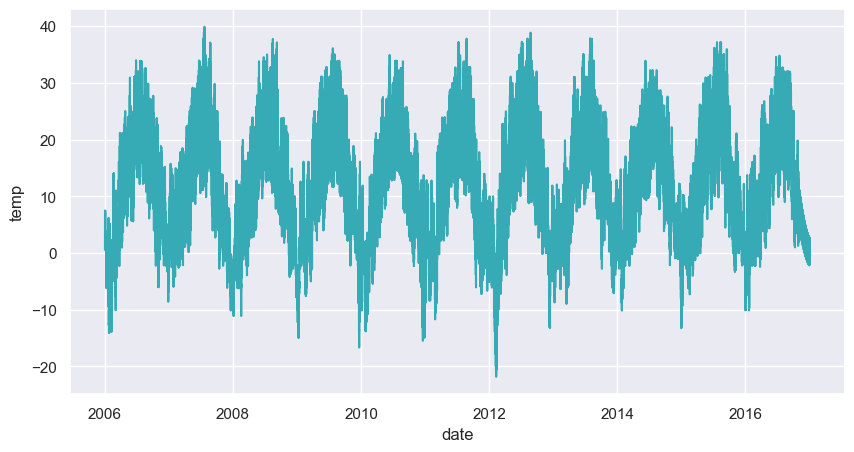

In [6]:
sns.set_theme()
color_pal = sns.color_palette('husl',9)
plt.figure(figsize=(10,5))
plt.plot(weather['Formatted Date'], weather['Temperature (C)'],'-',color=color_pal[5])
plt.xlabel('date')
plt.ylabel('temp')
plt.show()

In [8]:
weather['Temperature (C)'] = np.asarray(weather['Temperature (C)']).astype(np.float32)

In [9]:
def prepare_data(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [10]:
WINDOW_SIZE = 5
X, y = prepare_data(weather['Temperature (C)'], WINDOW_SIZE)
X.shape, y.shape

((96448, 5, 1), (96448,))

In [11]:
X_train, y_train = X[:76448], y[:76448]
X_val, y_val = X[76448:86448], y[76448:86448]
X_test, y_test = X[86448:], y[86448:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((76448, 5, 1), (76448,), (10000, 5, 1), (10000,), (10000, 5, 1), (10000,))

3. Import Tenserflow

In [12]:
#Import tenserflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


4. Model LSTM

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to overcome the limitations of traditional RNNs in capturing long-term dependencies in sequential data. LSTM models are particularly well-suited for tasks involving sequential data, such as time series forecasting, natural language processing, and speech recognition. They achieve this by incorporating a memory cell with self-regulating mechanisms, allowing them to selectively retain or forget information over multiple time steps. 

In [13]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
cp1 = ModelCheckpoint('models/model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [15]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
2388/2389 [============================>.] - ETA: 0s - loss: 35.8565 - root_mean_squared_error: 5.9880INFO:tensorflow:Assets written to: models/model1\assets


INFO:tensorflow:Assets written to: models/model1\assets


2389/2389 [==============================] - 16s 6ms/step - loss: 35.8430 - root_mean_squared_error: 5.9869 - val_loss: 2.7591 - val_root_mean_squared_error: 1.6611
Epoch 2/10
2387/2389 [============================>.] - ETA: 0s - loss: 2.4070 - root_mean_squared_error: 1.5515INFO:tensorflow:Assets written to: models/model1\assets


INFO:tensorflow:Assets written to: models/model1\assets


2389/2389 [==============================] - 13s 6ms/step - loss: 2.4065 - root_mean_squared_error: 1.5513 - val_loss: 1.3104 - val_root_mean_squared_error: 1.1447
Epoch 3/10
2386/2389 [============================>.] - ETA: 0s - loss: 1.7396 - root_mean_squared_error: 1.3190INFO:tensorflow:Assets written to: models/model1\assets


INFO:tensorflow:Assets written to: models/model1\assets


2389/2389 [==============================] - 14s 6ms/step - loss: 1.7389 - root_mean_squared_error: 1.3187 - val_loss: 1.1350 - val_root_mean_squared_error: 1.0654
Epoch 4/10
2382/2389 [============================>.] - ETA: 0s - loss: 1.6203 - root_mean_squared_error: 1.2729INFO:tensorflow:Assets written to: models/model1\assets


INFO:tensorflow:Assets written to: models/model1\assets


2389/2389 [==============================] - 17s 7ms/step - loss: 1.6193 - root_mean_squared_error: 1.2725 - val_loss: 1.0831 - val_root_mean_squared_error: 1.0407
Epoch 5/10
2384/2389 [============================>.] - ETA: 0s - loss: 1.5842 - root_mean_squared_error: 1.2587INFO:tensorflow:Assets written to: models/model1\assets


INFO:tensorflow:Assets written to: models/model1\assets


2389/2389 [==============================] - 17s 7ms/step - loss: 1.5841 - root_mean_squared_error: 1.2586 - val_loss: 1.0675 - val_root_mean_squared_error: 1.0332
Epoch 6/10
2383/2389 [============================>.] - ETA: 0s - loss: 1.5614 - root_mean_squared_error: 1.2496INFO:tensorflow:Assets written to: models/model1\assets


INFO:tensorflow:Assets written to: models/model1\assets


2389/2389 [==============================] - 13s 6ms/step - loss: 1.5622 - root_mean_squared_error: 1.2499 - val_loss: 1.0506 - val_root_mean_squared_error: 1.0250
Epoch 7/10
2389/2389 [==============================] - 10s 4ms/step - loss: 1.5503 - root_mean_squared_error: 1.2451 - val_loss: 1.0685 - val_root_mean_squared_error: 1.0337
Epoch 8/10
2378/2389 [============================>.] - ETA: 0s - loss: 1.5391 - root_mean_squared_error: 1.2406INFO:tensorflow:Assets written to: models/model1\assets


INFO:tensorflow:Assets written to: models/model1\assets


2389/2389 [==============================] - 13s 5ms/step - loss: 1.5397 - root_mean_squared_error: 1.2408 - val_loss: 1.0404 - val_root_mean_squared_error: 1.0200
Epoch 9/10
2389/2389 [==============================] - 10s 4ms/step - loss: 1.5332 - root_mean_squared_error: 1.2382 - val_loss: 1.0873 - val_root_mean_squared_error: 1.0427
Epoch 10/10
2389/2389 [==============================] - 10s 4ms/step - loss: 1.5267 - root_mean_squared_error: 1.2356 - val_loss: 1.0460 - val_root_mean_squared_error: 1.0228


In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('models/model1/')

In [17]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions 1':train_predictions, 'Actuals 1':y_train})
train_results

2389/2389 [==============================] - 6s 2ms/step


Train Predictions 1  Actuals 1
0                 1.133143   1.205556
1                 1.197818   2.222222
2                 2.538681   2.072222
3                 2.322063   2.200000
4                 2.263392   2.733333
...                    ...        ...
76443            21.191107  21.322222
76444            22.202406  22.338888
76445            23.040257  22.966667
76446            23.380671  24.883333
76447            25.693195  23.844444

[76448 rows x 2 columns]

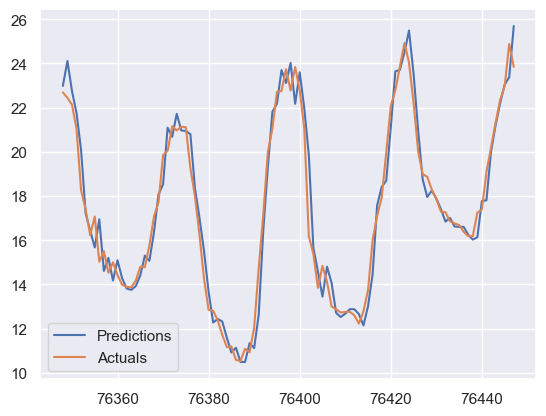

In [18]:
plt.plot(train_results['Train Predictions 1'][76348:], label='Predictions')
plt.plot(train_results['Actuals 1'][76348:], label='Actuals')
plt.legend()

In [19]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions 1':val_predictions, 'Actuals 1':y_val})
val_results

313/313 [==============================] - 1s 2ms/step


Val Predictions 1  Actuals 1
0             23.500635  22.727777
1             21.679441  22.244444
2             21.167574  18.983334
3             17.962791  18.900000
4             17.848301  17.777779
...                 ...        ...
9995          14.952288  14.950000
9996          14.963010  14.972222
9997          14.956521  13.855556
9998          13.567336  14.883333
9999          15.064273  13.044444

[10000 rows x 2 columns]

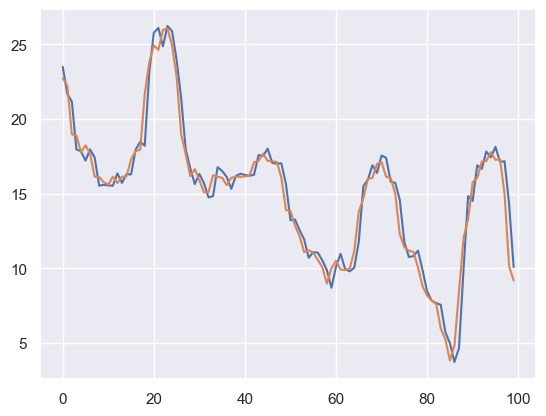

In [20]:
plt.plot(val_results['Val Predictions 1'][:100], label='Predictions')
plt.plot(val_results['Actuals 1'][:100], label='Actuals')

In [21]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions 1':test_predictions, 'Actuals 1':y_test})
test_results

313/313 [==============================] - 1s 2ms/step


Test Predictions 1  Actuals 1
0              12.683419  15.000000
1              15.438949  17.177778
2              18.761353  17.838888
3              19.050283  19.972221
4              21.095125  21.061111
...                  ...        ...
9995            0.938887   0.488889
9996            0.366026   0.072222
9997           -0.213480  -0.233333
9998           -0.494196  -0.472222
9999           -0.643357  -0.677778

[10000 rows x 2 columns]

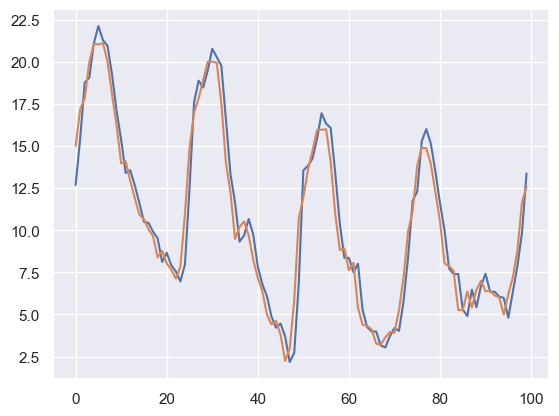

In [22]:
plt.plot(test_results['Test Predictions 1'][:100], label='Predictions')
plt.plot(test_results['Actuals 1'][:100], label='Actuals')

In [23]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

313/313 [==============================] - 1s 2ms/step


(      Predictions    Actuals
 0       12.683419  15.000000
 1       15.438949  17.177778
 2       18.761353  17.838888
 3       19.050283  19.972221
 4       21.095125  21.061111
 ...           ...        ...
 9995     0.938887   0.488889
 9996     0.366026   0.072222
 9997    -0.213480  -0.233333
 9998    -0.494196  -0.472222
 9999    -0.643357  -0.677778
 
 [10000 rows x 2 columns],
 0.82570153)

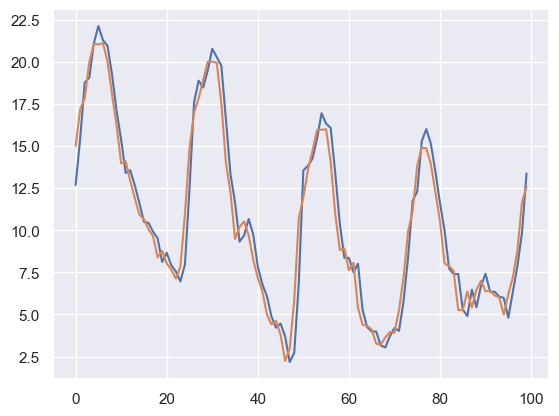

In [24]:
plot_predictions1(model1, X_test, y_test)

5. Model 
The Conv1D model is a type of convolutional neural network (CNN) architecture designed specifically for processing one-dimensional sequential data. Conv1D models are particularly effective for tasks such as speech recognition, natural language processing (NLP), sentiment analysis, and time series forecasting. They are capable of learning complex patterns in sequential data and can automatically extract relevant features without the need for manual feature engineering

In [25]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cp2 = ModelCheckpoint('models/model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [27]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
2359/2389 [============================>.] - ETA: 0s - loss: 5.3540 - root_mean_squared_error: 2.3139INFO:tensorflow:Assets written to: models/model2\assets


INFO:tensorflow:Assets written to: models/model2\assets


2389/2389 [==============================] - 5s 2ms/step - loss: 5.3117 - root_mean_squared_error: 2.3047 - val_loss: 1.3859 - val_root_mean_squared_error: 1.1772
Epoch 2/10
2383/2389 [============================>.] - ETA: 0s - loss: 1.6940 - root_mean_squared_error: 1.3015INFO:tensorflow:Assets written to: models/model2\assets


INFO:tensorflow:Assets written to: models/model2\assets


2389/2389 [==============================] - 5s 2ms/step - loss: 1.6935 - root_mean_squared_error: 1.3013 - val_loss: 1.1318 - val_root_mean_squared_error: 1.0639
Epoch 3/10
2383/2389 [============================>.] - ETA: 0s - loss: 1.6295 - root_mean_squared_error: 1.2765INFO:tensorflow:Assets written to: models/model2\assets


INFO:tensorflow:Assets written to: models/model2\assets


2389/2389 [==============================] - 5s 2ms/step - loss: 1.6292 - root_mean_squared_error: 1.2764 - val_loss: 1.0873 - val_root_mean_squared_error: 1.0427
Epoch 4/10
2389/2389 [==============================] - 5s 2ms/step - loss: 1.6216 - root_mean_squared_error: 1.2734 - val_loss: 1.2264 - val_root_mean_squared_error: 1.1074
Epoch 5/10
2387/2389 [============================>.] - ETA: 0s - loss: 1.6194 - root_mean_squared_error: 1.2726INFO:tensorflow:Assets written to: models/model2\assets


INFO:tensorflow:Assets written to: models/model2\assets


2389/2389 [==============================] - 5s 2ms/step - loss: 1.6193 - root_mean_squared_error: 1.2725 - val_loss: 1.0711 - val_root_mean_squared_error: 1.0350
Epoch 6/10
2389/2389 [==============================] - 5s 2ms/step - loss: 1.6116 - root_mean_squared_error: 1.2695 - val_loss: 1.0768 - val_root_mean_squared_error: 1.0377
Epoch 7/10
2365/2389 [============================>.] - ETA: 0s - loss: 1.6125 - root_mean_squared_error: 1.2699INFO:tensorflow:Assets written to: models/model2\assets


INFO:tensorflow:Assets written to: models/model2\assets


2389/2389 [==============================] - 5s 2ms/step - loss: 1.6117 - root_mean_squared_error: 1.2695 - val_loss: 1.0649 - val_root_mean_squared_error: 1.0319
Epoch 8/10
2367/2389 [============================>.] - ETA: 0s - loss: 1.6052 - root_mean_squared_error: 1.2670INFO:tensorflow:Assets written to: models/model2\assets


INFO:tensorflow:Assets written to: models/model2\assets


2389/2389 [==============================] - 5s 2ms/step - loss: 1.6039 - root_mean_squared_error: 1.2665 - val_loss: 1.0636 - val_root_mean_squared_error: 1.0313
Epoch 9/10
2389/2389 [==============================] - 4s 2ms/step - loss: 1.6020 - root_mean_squared_error: 1.2657 - val_loss: 1.0639 - val_root_mean_squared_error: 1.0314
Epoch 10/10
2359/2389 [============================>.] - ETA: 0s - loss: 1.5980 - root_mean_squared_error: 1.2641INFO:tensorflow:Assets written to: models/model2\assets


INFO:tensorflow:Assets written to: models/model2\assets



2389/2389 [==============================] - 5s 2ms/step - loss: 1.5990 - root_mean_squared_error: 1.2645 - val_loss: 1.0516 - val_root_mean_squared_error: 1.0255


In [28]:
model2 = load_model('models/model2/')

In [29]:
train_predictions2 = model2.predict(X_train).flatten()
train_results2 = pd.DataFrame(data={'Train Predictions 2':train_predictions2, 'Actuals 2':y_train})
train_results2

2389/2389 [==============================] - 3s 1ms/step


Train Predictions 2  Actuals 2
0                 1.198851   1.205556
1                 1.269837   2.222222
2                 2.679876   2.072222
3                 2.523491   2.200000
4                 2.389658   2.733333
...                    ...        ...
76443            21.050100  21.322222
76444            22.161873  22.338888
76445            22.999216  22.966667
76446            23.420238  24.883333
76447            25.702106  23.844444

[76448 rows x 2 columns]

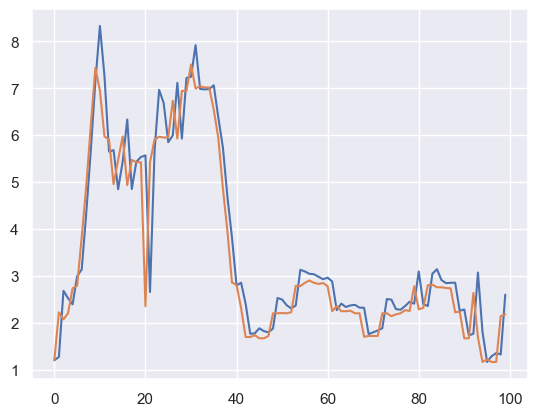

In [30]:
plt.plot(train_results2['Train Predictions 2'][:100])
plt.plot(train_results2['Actuals 2'][:100])

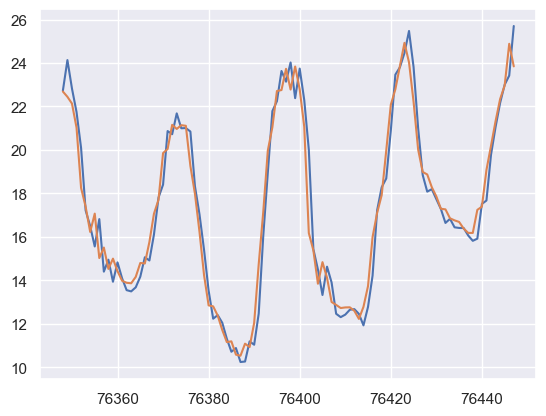

In [31]:
plt.plot(train_results2['Train Predictions 2'][76348:])
plt.plot(train_results2['Actuals 2'][76348:])

In [32]:
val_predictions2 = model2.predict(X_val).flatten()
val_results2 = pd.DataFrame(data={'Val Predictions 2':val_predictions2, 'Actuals 2':y_val})
val_results2

313/313 [==============================] - 0s 1ms/step


Val Predictions 2  Actuals 2
0             23.829140  22.727777
1             21.760197  22.244444
2             21.151396  18.983334
3             17.958458  18.900000
4             18.008993  17.777779
...                 ...        ...
9995          14.940504  14.950000
9996          14.758795  14.972222
9997          14.739613  13.855556
9998          13.288813  14.883333
9999          14.790982  13.044444

[10000 rows x 2 columns]

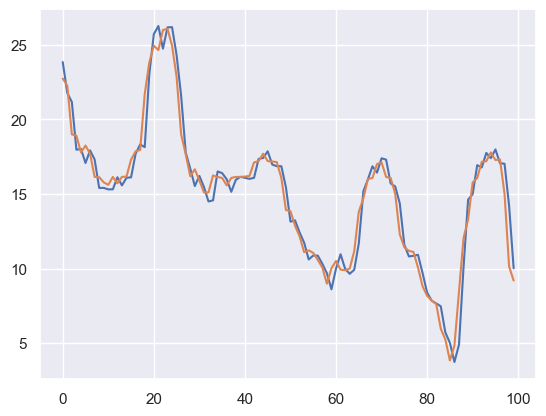

In [33]:
plt.plot(val_results2['Val Predictions 2'][:100])
plt.plot(val_results2['Actuals 2'][:100])

In [34]:
test_predictions2 = model2.predict(X_test).flatten()
test_results2 = pd.DataFrame(data={'Test Predictions 2':test_predictions2, 'Actuals 2':y_test})
test_results2

313/313 [==============================] - 0s 1ms/step


Test Predictions 2  Actuals 2
0              12.500875  15.000000
1              15.193181  17.177778
2              18.439415  17.838888
3              19.035561  19.972221
4              20.936825  21.061111
...                  ...        ...
9995            1.074144   0.488889
9996            0.472086   0.072222
9997           -0.076127  -0.233333
9998           -0.337399  -0.472222
9999           -0.548735  -0.677778

[10000 rows x 2 columns]

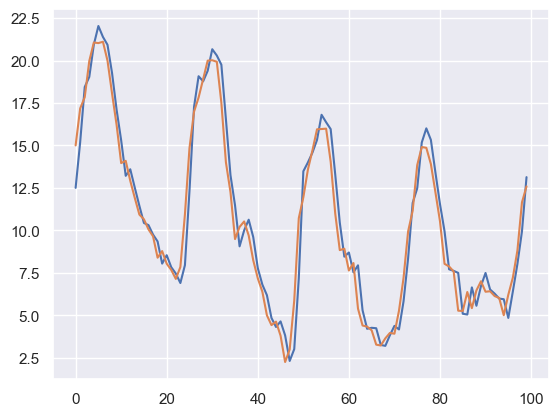

In [35]:
plt.plot(test_results2['Test Predictions 2'][:100])
plt.plot(test_results2['Actuals 2'][:100])

313/313 [==============================] - 0s 1ms/step


(      Predictions    Actuals
 0       12.500875  15.000000
 1       15.193181  17.177778
 2       18.439415  17.838888
 3       19.035561  19.972221
 4       20.936825  21.061111
 ...           ...        ...
 9995     1.074144   0.488889
 9996     0.472086   0.072222
 9997    -0.076127  -0.233333
 9998    -0.337399  -0.472222
 9999    -0.548735  -0.677778
 
 [10000 rows x 2 columns],
 0.85188997)

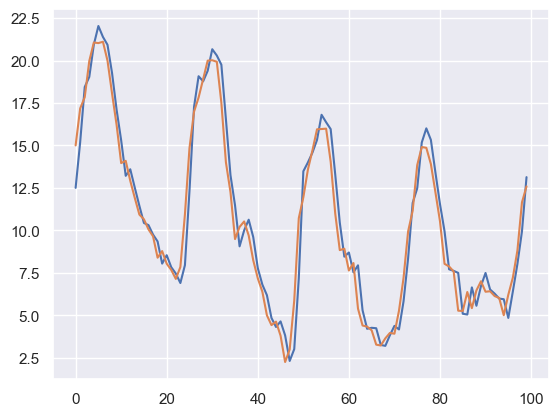

In [36]:
plot_predictions1(model2, X_test, y_test)

6. Model GRU 
A GRU (Gated Recurrent Unit) model is a type of recurrent neural network (RNN). The GRU model consists of recurrent units with gating mechanisms that control the flow of information. GRU models are widely used in various sequential data processing tasks, including natural language processing (NLP), speech recognition, time series forecasting, and machine translation. They offer several advantages over traditional RNNs, such as faster training convergence, better ability to capture long-range dependencies, and reduced risk of vanishing gradients. 

In [37]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
cp3 = ModelCheckpoint('models/model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [39]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
2383/2389 [============================>.] - ETA: 0s - loss: 226.0741 - root_mean_squared_error: 15.0358INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 14s 5ms/step - loss: 226.0529 - root_mean_squared_error: 15.0351 - val_loss: 199.3837 - val_root_mean_squared_error: 14.1203
Epoch 2/10
2388/2389 [============================>.] - ETA: 0s - loss: 173.5159 - root_mean_squared_error: 13.1725INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 11s 5ms/step - loss: 173.4945 - root_mean_squared_error: 13.1717 - val_loss: 141.9596 - val_root_mean_squared_error: 11.9147
Epoch 3/10
2373/2389 [============================>.] - ETA: 0s - loss: 127.6783 - root_mean_squared_error: 11.2995INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 11s 5ms/step - loss: 127.4819 - root_mean_squared_error: 11.2908 - val_loss: 107.6571 - val_root_mean_squared_error: 10.3758
Epoch 4/10
2386/2389 [============================>.] - ETA: 0s - loss: 98.6381 - root_mean_squared_error: 9.9317INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 11s 5ms/step - loss: 98.6141 - root_mean_squared_error: 9.9305 - val_loss: 84.3020 - val_root_mean_squared_error: 9.1816
Epoch 5/10
2371/2389 [============================>.] - ETA: 0s - loss: 76.8852 - root_mean_squared_error: 8.7684INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 11s 5ms/step - loss: 76.8048 - root_mean_squared_error: 8.7638 - val_loss: 64.9706 - val_root_mean_squared_error: 8.0604
Epoch 6/10
2389/2389 [==============================] - ETA: 0s - loss: 58.5287 - root_mean_squared_error: 7.6504INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 11s 5ms/step - loss: 58.5287 - root_mean_squared_error: 7.6504 - val_loss: 48.9840 - val_root_mean_squared_error: 6.9989
Epoch 7/10
2380/2389 [============================>.] - ETA: 0s - loss: 43.4108 - root_mean_squared_error: 6.5887INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 11s 5ms/step - loss: 43.3921 - root_mean_squared_error: 6.5873 - val_loss: 35.8969 - val_root_mean_squared_error: 5.9914
Epoch 8/10
2383/2389 [============================>.] - ETA: 0s - loss: 31.2100 - root_mean_squared_error: 5.5866INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 11s 5ms/step - loss: 31.1885 - root_mean_squared_error: 5.5847 - val_loss: 25.5884 - val_root_mean_squared_error: 5.0585
Epoch 9/10
2383/2389 [============================>.] - ETA: 0s - loss: 21.7536 - root_mean_squared_error: 4.6641INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets


2389/2389 [==============================] - 12s 5ms/step - loss: 21.7364 - root_mean_squared_error: 4.6622 - val_loss: 17.7405 - val_root_mean_squared_error: 4.2119
Epoch 10/10
2385/2389 [============================>.] - ETA: 0s - loss: 14.7260 - root_mean_squared_error: 3.8375INFO:tensorflow:Assets written to: models/model3\assets


INFO:tensorflow:Assets written to: models/model3\assets



2389/2389 [==============================] - 11s 5ms/step - loss: 14.7197 - root_mean_squared_error: 3.8366 - val_loss: 11.9330 - val_root_mean_squared_error: 3.4544


In [40]:
model3 = load_model('models/model3/')

In [41]:
train_predictions3 = model3.predict(X_train).flatten()
train_results3 = pd.DataFrame(data={'Train Predictions 3':train_predictions3, 'Actuals 3':y_train})
train_results3

2389/2389 [==============================] - 5s 2ms/step


Train Predictions 3  Actuals 3
0                 1.356553   1.205556
1                 0.948507   2.222222
2                 2.306246   2.072222
3                 2.676034   2.200000
4                 2.359925   2.733333
...                    ...        ...
76443            19.276365  21.322222
76444            19.492704  22.338888
76445            19.553278  22.966667
76446            19.575256  24.883333
76447            19.607517  23.844444

[76448 rows x 2 columns]

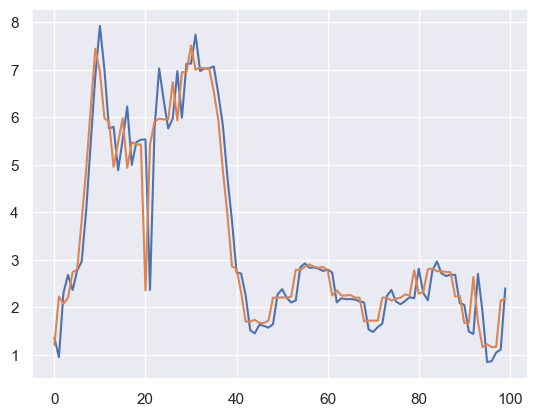

In [42]:
plt.plot(train_results3['Train Predictions 3'][:100])
plt.plot(train_results3['Actuals 3'][:100])

In [43]:
val_predictions3 = model3.predict(X_val).flatten()
val_results3 = pd.DataFrame(data={'Val Predictions 3':val_predictions3, 'Actuals 3':y_val})
val_results3

313/313 [==============================] - 1s 2ms/step


Val Predictions 3  Actuals 3
0             19.593882  22.727777
1             19.566797  22.244444
2             19.548315  18.983334
3             18.861513  18.900000
4             18.764803  17.777779
...                 ...        ...
9995          15.201445  14.950000
9996          14.761431  14.972222
9997          14.926189  13.855556
9998          13.629131  14.883333
9999          14.749812  13.044444

[10000 rows x 2 columns]

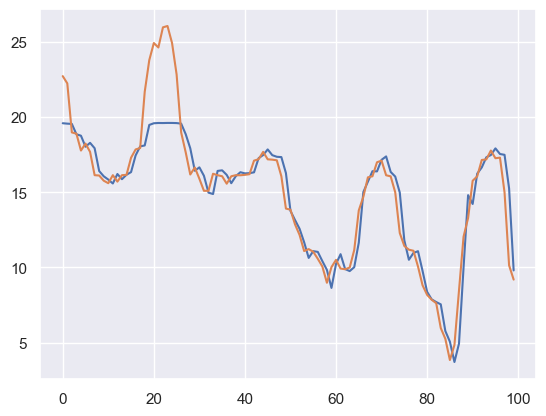

In [44]:
plt.plot(val_results3['Val Predictions 3'][:100])
plt.plot(val_results3['Actuals 3'][:100])

In [45]:
test_predictions3 = model3.predict(X_test).flatten()
test_results3 = pd.DataFrame(data={'Test Predictions 3':test_predictions3, 'Actuals 3':y_test})
test_results3

313/313 [==============================] - 1s 2ms/step


Test Predictions 3  Actuals 3
0              12.991879  15.000000
1              14.995964  17.177778
2              17.798471  17.838888
3              18.148142  19.972221
4              19.170376  21.061111
...                  ...        ...
9995            0.700615   0.488889
9996            0.120074   0.072222
9997           -0.471048  -0.233333
9998           -1.017170  -0.472222
9999           -1.375164  -0.677778

[10000 rows x 2 columns]

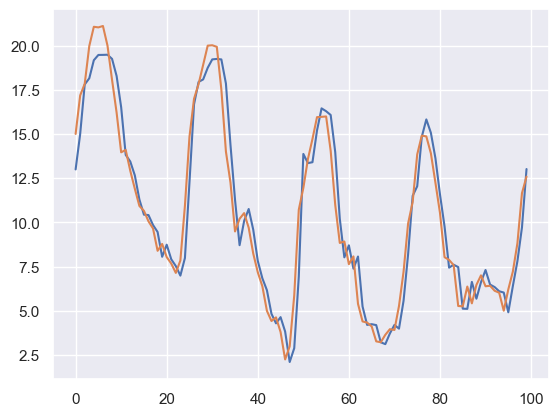

In [46]:
plt.plot(test_results3['Test Predictions 3'][:100])
plt.plot(test_results3['Actuals 3'][:100])

313/313 [==============================] - 1s 2ms/step


(      Predictions    Actuals
 0       12.991879  15.000000
 1       14.995964  17.177778
 2       17.798471  17.838888
 3       18.148142  19.972221
 4       19.170376  21.061111
 ...           ...        ...
 9995     0.700615   0.488889
 9996     0.120074   0.072222
 9997    -0.471048  -0.233333
 9998    -1.017170  -0.472222
 9999    -1.375164  -0.677778
 
 [10000 rows x 2 columns],
 8.390261)

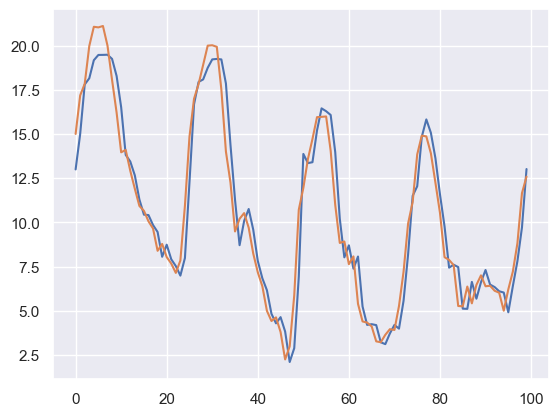

In [47]:
plot_predictions1(model3, X_test, y_test)

7. Summary


    In the project focused on forecasting weather, a comparison was made between three models: GRU (Gated Recurrent Unit), Conv1D (one-dimensional convolutional neural network), and LSTM (Long Short-Term Memory). Among these models, LSTM consistently delivered the most accurate predictions, with forecasted values closely resembling the actual weather conditions. This superior performance of LSTM can be attributed to its ability to capture long-term dependencies and intricate temporal patterns in sequential data, which are essential for accurate weather forecasting. Although GRU and Conv1D models also demonstrated satisfactory performance, LSTM's advanced architecture proved to be the most effective in generating reliable weather predictions. This underscores the importance of utilizing LSTM models for tasks requiring precise forecasting of sequential data, such as weather prediction.

    

  Below, I have included several visualizations confirming the described results of the project

In [48]:
comparision = pd.concat([test_results, test_results2, test_results3], axis=1,).reindex(test_results.index)
comparision = comparision.drop(columns=['Actuals 1', 'Actuals 2']).rename(columns={'Test Predictions 1': 'LSTM','Test Predictions 2': 'Conv1D','Test Predictions 3': 'GRU', 'Actuals 3': 'Actuals'})
comparision

LSTM     Conv1D        GRU    Actuals
0     12.683419  12.500875  12.991879  15.000000
1     15.438949  15.193181  14.995964  17.177778
2     18.761353  18.439415  17.798471  17.838888
3     19.050283  19.035561  18.148142  19.972221
4     21.095125  20.936825  19.170376  21.061111
...         ...        ...        ...        ...
9995   0.938887   1.074144   0.700615   0.488889
9996   0.366026   0.472086   0.120074   0.072222
9997  -0.213480  -0.076127  -0.471048  -0.233333
9998  -0.494196  -0.337399  -1.017170  -0.472222
9999  -0.643357  -0.548735  -1.375164  -0.677778

[10000 rows x 4 columns]

In [49]:
delta = pd.concat([test_results, test_results2, test_results3], axis=1,).reindex(test_results.index)
delta['LSTM'] = abs(test_results['Actuals 1']- test_results['Test Predictions 1'])
delta['Conv1D'] = abs(test_results2['Actuals 2']- test_results2['Test Predictions 2'])
delta['GRU'] = abs(test_results3['Actuals 3']- test_results3['Test Predictions 3'])
delta = delta.drop(columns=['Actuals 3', 'Actuals 2', 'Actuals 1', 'Test Predictions 3', 'Test Predictions 2', 'Test Predictions 1' ])
delta.style.highlight_max(color= 'pink', axis=1)

In [50]:
def count_max_values(delta):
    gru=0
    lstm=0
    conv1d=0
    number=0
    arr = []
    while number < delta.shape[0]:
        max_value = delta.max(axis=1) 
        
        if(max_value[number] == delta['GRU'][number]):
            gru+=1
           
        
        elif(max_value[number] == delta['LSTM'][number]):
            lstm+=1
        
        elif(max_value[number] == delta['Conv1D'][number]):
            conv1d+=1
        number +=1
        
    return gru, lstm, conv1d
    
count_max_values(delta)

deltaframe = pd.DataFrame({'LSTM':[count_max_values(delta)[1]], 'Conv1D':[count_max_values(delta)[2]], 'GRU':[count_max_values(delta)[0]]})
deltaframe.index.names = ['Number of highest delta']
deltaframe

GRU  LSTM  Conv1D
Number of highest delta                    
0                        5106  1930    2964

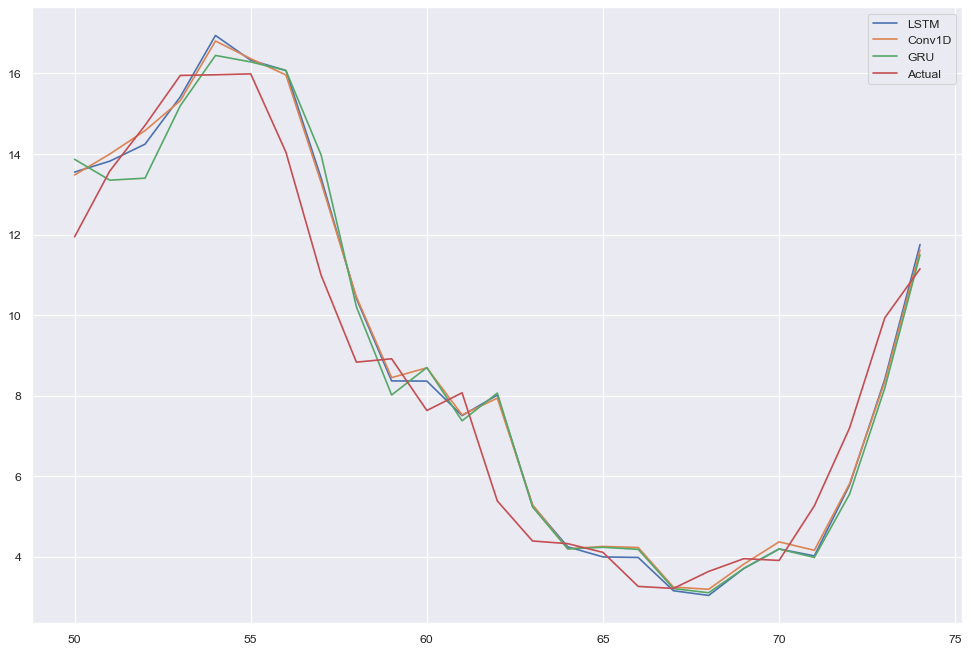

In [52]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
plt.plot(test_results['Test Predictions 1'][50:75], label='LSTM')
plt.plot(test_results2['Test Predictions 2'][50:75], label='Conv1D')
plt.plot(test_results3['Test Predictions 3'][50:75], label='GRU')
plt.plot(test_results['Actuals 1'][50:75], label='Actual')
plt.legend()

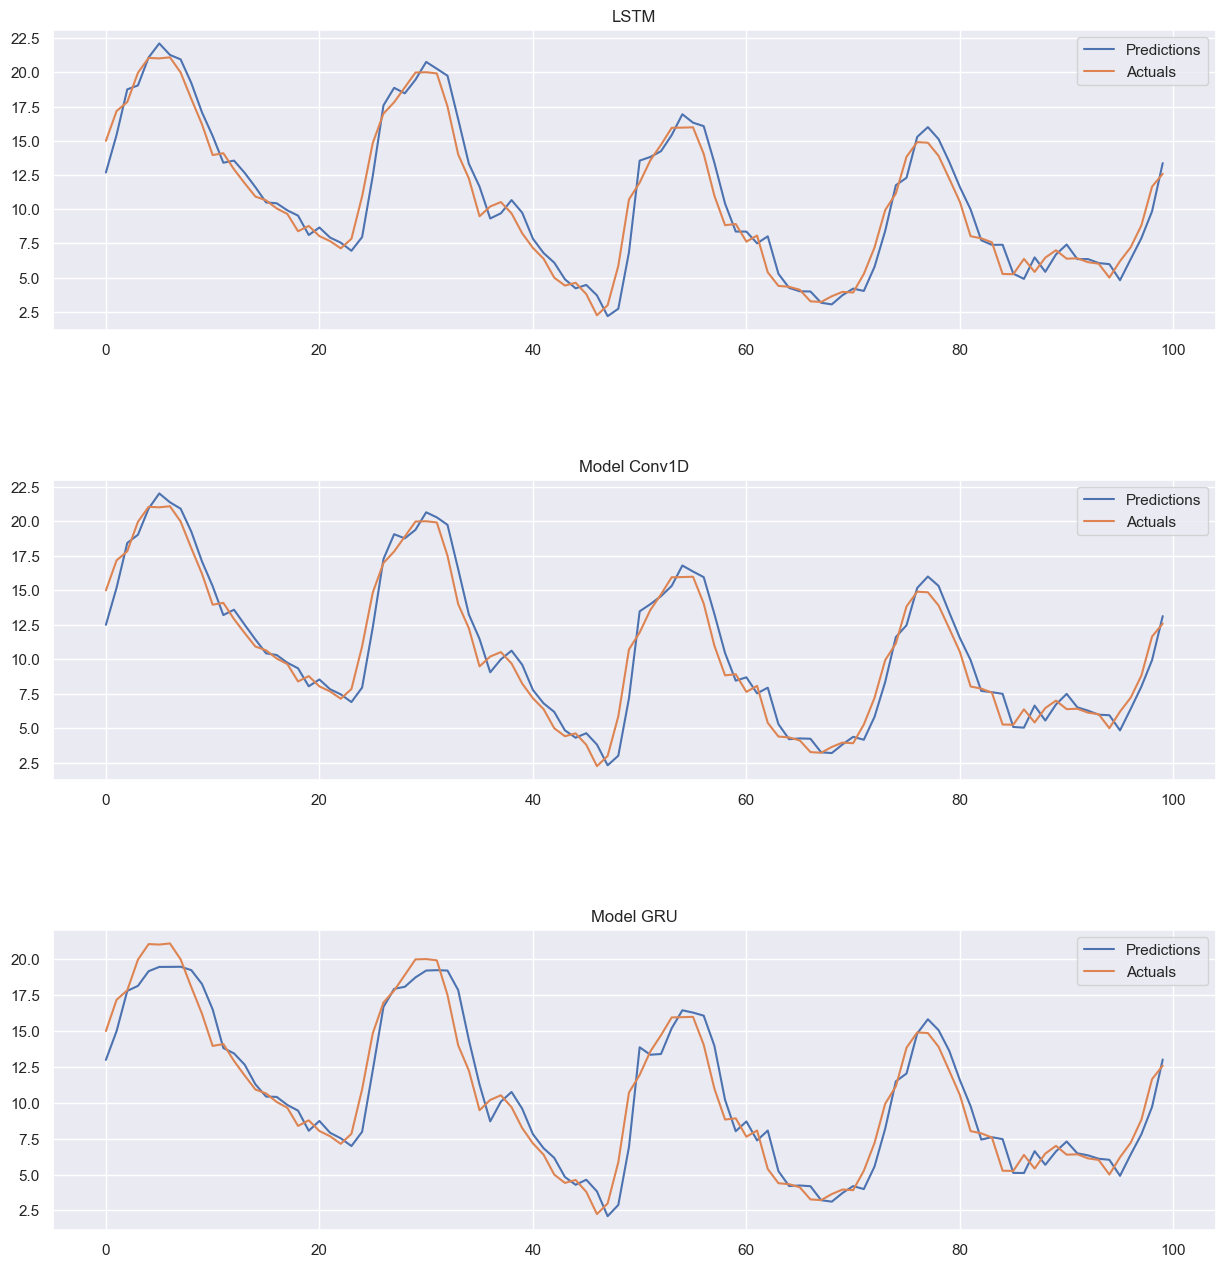

In [53]:
test1 = pd.concat([test_results['Test Predictions 1'][:100], test_results['Actuals 1'][:100]], axis=1,).reindex(test_results.index)
test1 = test1.rename(columns={'Test Predictions 1': 'Predictions','Actuals 1': 'Actuals'})
test2 = pd.concat([test_results2['Test Predictions 2'][:100], test_results2['Actuals 2'][:100]], axis=1,).reindex(test_results2.index)
test2 = test2.rename(columns={'Test Predictions 2': 'Predictions','Actuals 2': 'Actuals'})
test3 = pd.concat([test_results3['Test Predictions 3'][:100], test_results3['Actuals 3'][:100]], axis=1,).reindex(test_results3.index)
test3 = test3.rename(columns={'Test Predictions 3': 'Predictions','Actuals 3': 'Actuals'})

test_list = [test1 ,test2, test3]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

title = ['LSTM','Model Conv1D','Model GRU']
count=0
for r in range(3):
    test_list[count].plot(ax=axes[r], title=f'{title[r]}')
    count+=1
    
plt.subplots_adjust(bottom=0.1, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.5)
